In [411]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline

PATH='~/Downloads/Upgrad/Linear Regression Assignment/Data Files/'
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [412]:
#Loading our dataset
carprice=pd.read_csv(PATH+'CarPrice_Assignment.csv')


In [413]:
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [414]:
carprice.shape

(205, 26)

In [415]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [416]:
carDictionary=pd.read_excel(PATH+'Data Dictionary - carprices.xlsx')

In [417]:
pd.set_option('display.max_colwidth', -1)
carDictionary

,Variable,Desc
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
...,...,...
21,horsepower,Horsepower (Numeric)
22,peakrpm,car peak rpm (Numeric)
23,citympg,Mileage in city (Numeric)
24,highwaympg,Mileage on highway (Numeric)


In [418]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID        0
symboling     0
CarName       0
fueltype      0
aspiration    0
             ..
horsepower    0
peakrpm       0
citympg       0
highwaympg    0
price         0
Length: 26, dtype: int64

In [419]:
carprice['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [420]:
#Creating a new variable company from CarName and doing some spelling corrections
carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ')[0])
carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})


In [421]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


In [422]:
# get some basic ideas about the data
def summarize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe() )
            
        print ('\n')
    
summarize_data(carprice)

symboling
count    205.000000
mean     0.834146  
std      1.245307  
min     -2.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  
Name: symboling, dtype: float64


fueltype
gas       185
diesel    20 
Name: fueltype, dtype: int64


aspiration
std      168
turbo    37 
Name: aspiration, dtype: int64


doornumber
four    115
two     90 
Name: doornumber, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64


drivewheel
fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64


enginelocation
front    202
rear     3  
Name: enginelocation, dtype: int64


wheelbase
count    205.000000
mean     98.756585 
std      6.021776  
min      86.600000 
25%      94.500000 
50%      97.000000 
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64


carlength
count    205.000000
mean     174.049268
std      12.337289 
min      141.100000
25%      166.

# UNIVARIATE ANALYSIS

In [423]:
carprice.nunique()

symboling     6  
fueltype      2  
aspiration    2  
doornumber    2  
carbody       5  
             ..  
peakrpm       23 
citympg       29 
highwaympg    30 
price         189
Company       22 
Length: 25, dtype: int64

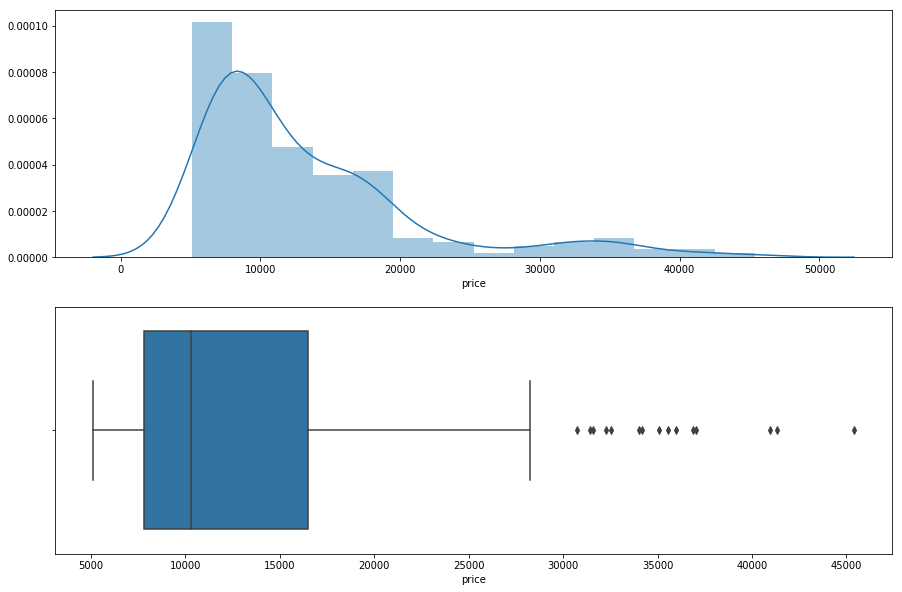

In [424]:
#Plotting the price of the our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price of the car ranges around 5k-45k with Median around 10k

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

In [425]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

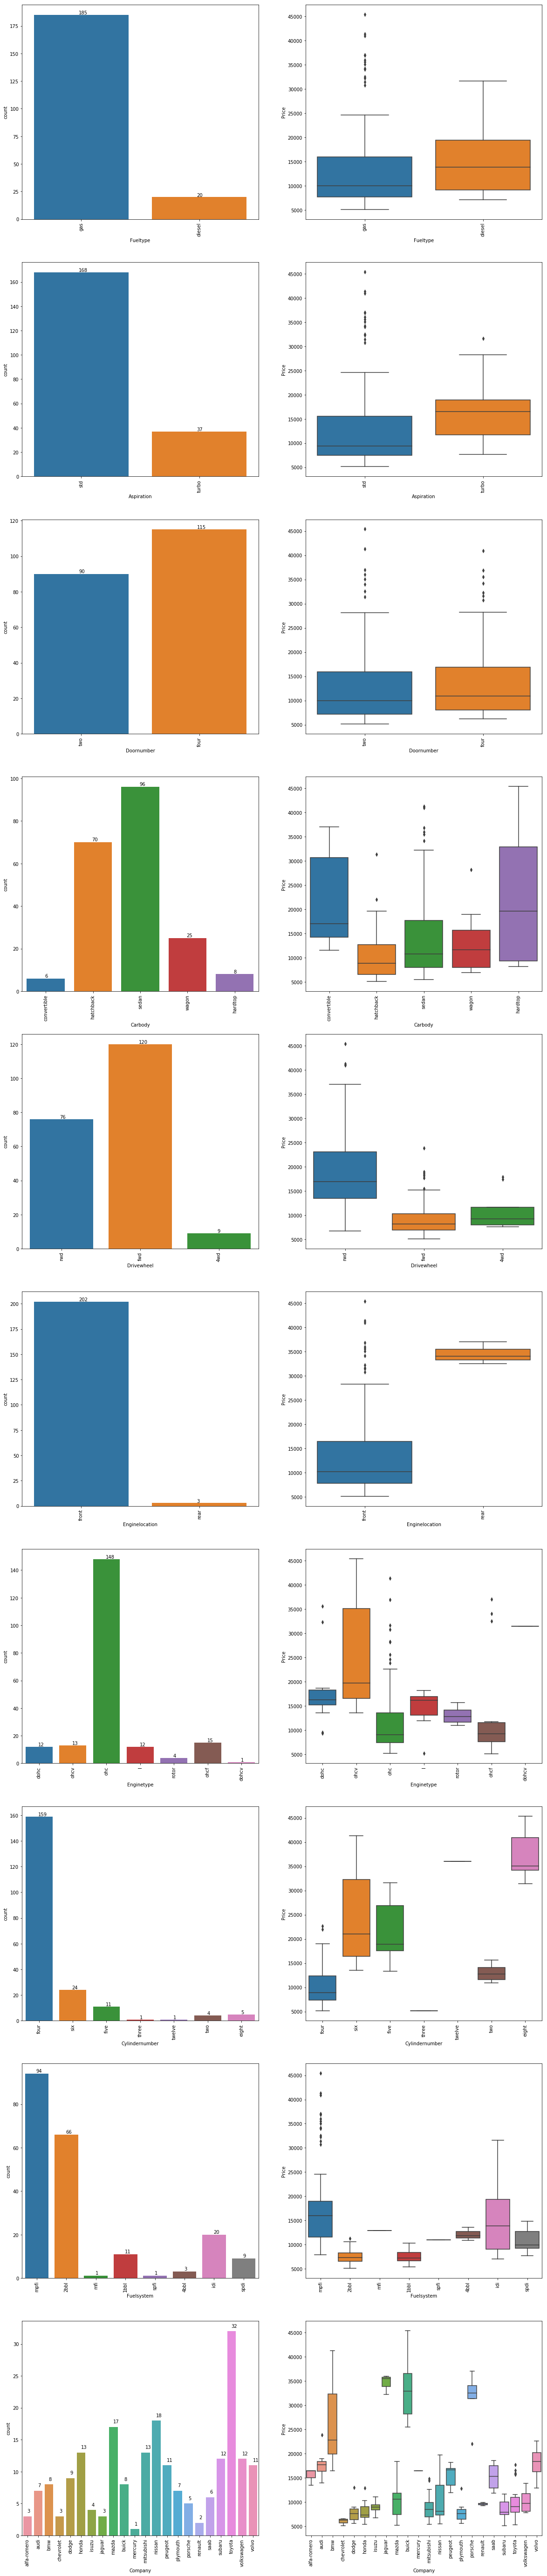

In [426]:
#Plotting categorical variables using Countplot and Boxplot
plt.figure(figsize=(20,100))
i=1
for col in carprice:
    if(carprice[col].dtypes==object):
        plt.subplot(10,2,i)
        ax=sns.countplot(carprice[col])
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6))
        plt.xticks(rotation=90)
        plt.xlabel(col.capitalize())
        
        plt.subplot(10,2,i+1)
        sns.boxplot(carprice[col],carprice['price'])
        plt.xticks(rotation=90)
        plt.xlabel(col.capitalize())
        plt.ylabel('Price')
        i+=2

In [427]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =120;

<IPython.core.display.Javascript object>

In [428]:
#Converting Cylindernumber and door number to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

We will not label encode the categorical variables and check the correlation between the variables

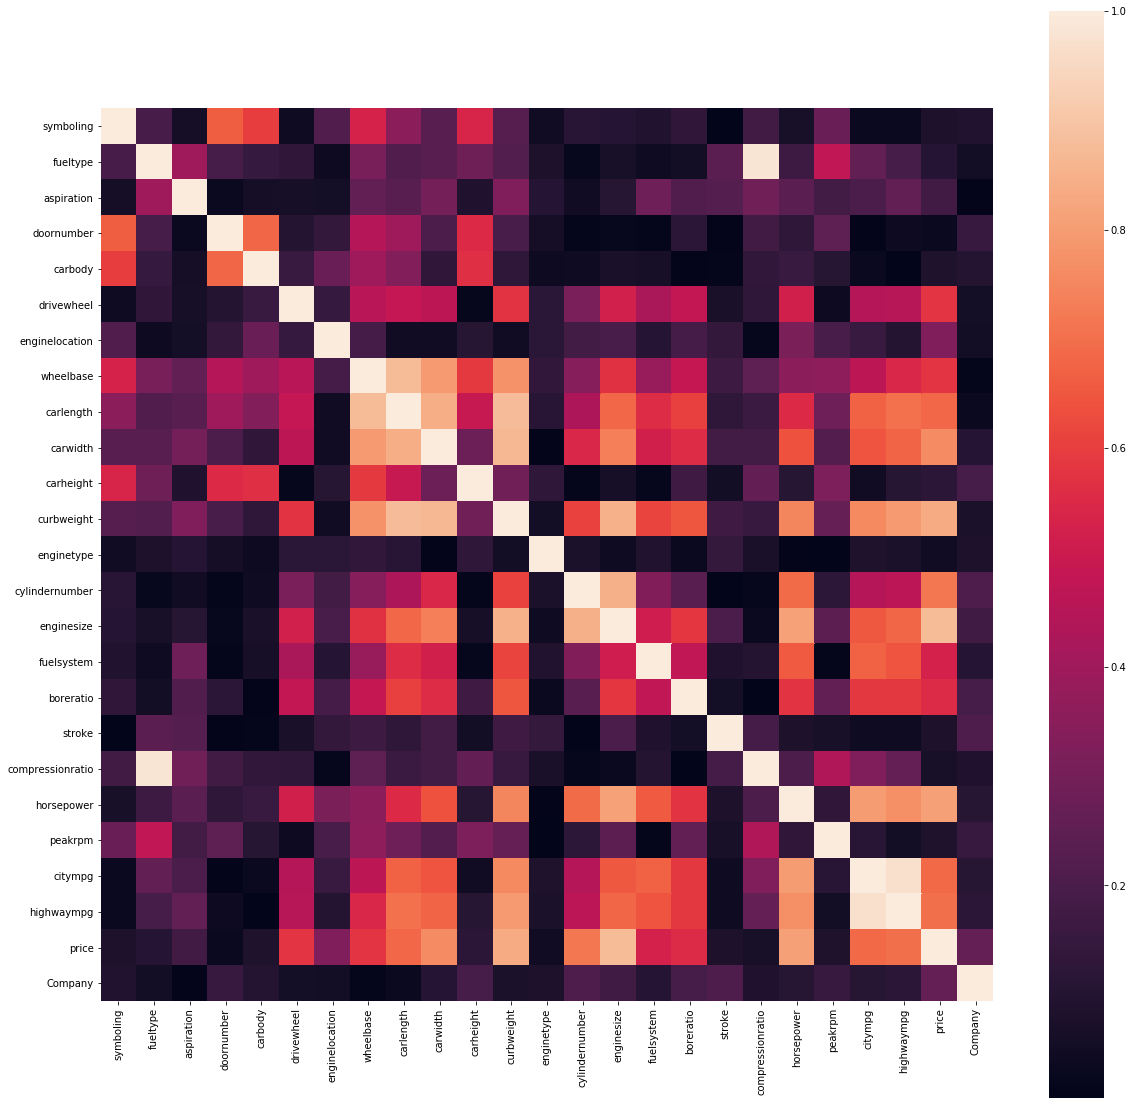

In [429]:
# Encode the categorical features as numbers to check correlation
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result


# Calculate the correlation and plot it
encoded_data= number_encode_features(carprice)
plt.figure(figsize=(20,20))
sns.heatmap(abs(encoded_data.corr()), square=True)


We can see that there is a high correlation between fueltype and compression ratio, and , highwaympg and citympg. Lets check on this further.

    fueltype  compressionratio
0    gas      9.0             
1    gas      9.0             
2    gas      9.0             
3    gas      10.0            
4    gas      8.0             
..   ...      ...             
200  gas      9.5             
201  gas      8.7             
202  gas      8.8             
203  diesel   23.0            
204  gas      9.5             

[205 rows x 2 columns]


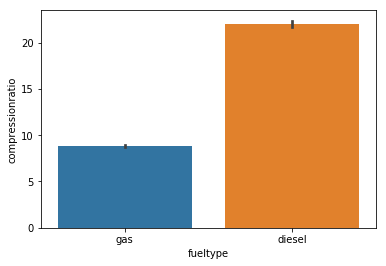

In [430]:
#Lets first analyse fueltype and compression ratio
print(carprice[["fueltype", "compressionratio"]])
sns.barplot("fueltype", "compressionratio",data=carprice)

We can see the difference in the compression ratio between gas and diesel and clearly see why the columns have high correlation, we will drop compression ratio in our further analysis.

In [431]:
#Dropping compressionratio
carprice.drop('compressionratio',axis=1,inplace=True)

     citympg  highwaympg
0    21       27        
1    21       27        
2    19       26        
3    24       30        
4    18       22        
..   ..       ..        
200  23       28        
201  19       25        
202  18       23        
203  26       27        
204  19       25        

[205 rows x 2 columns]


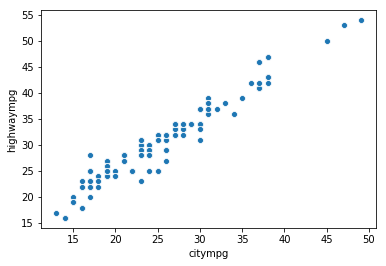

In [432]:
# Lets take a look at citympg and highwaympg variables
print(carprice[["citympg", "highwaympg"]])
sns.scatterplot("citympg", "highwaympg",data=carprice)

In [433]:
#Dropping citympg as it is highly corelated with highwaympg
carprice.drop('citympg',axis=1,inplace=True)

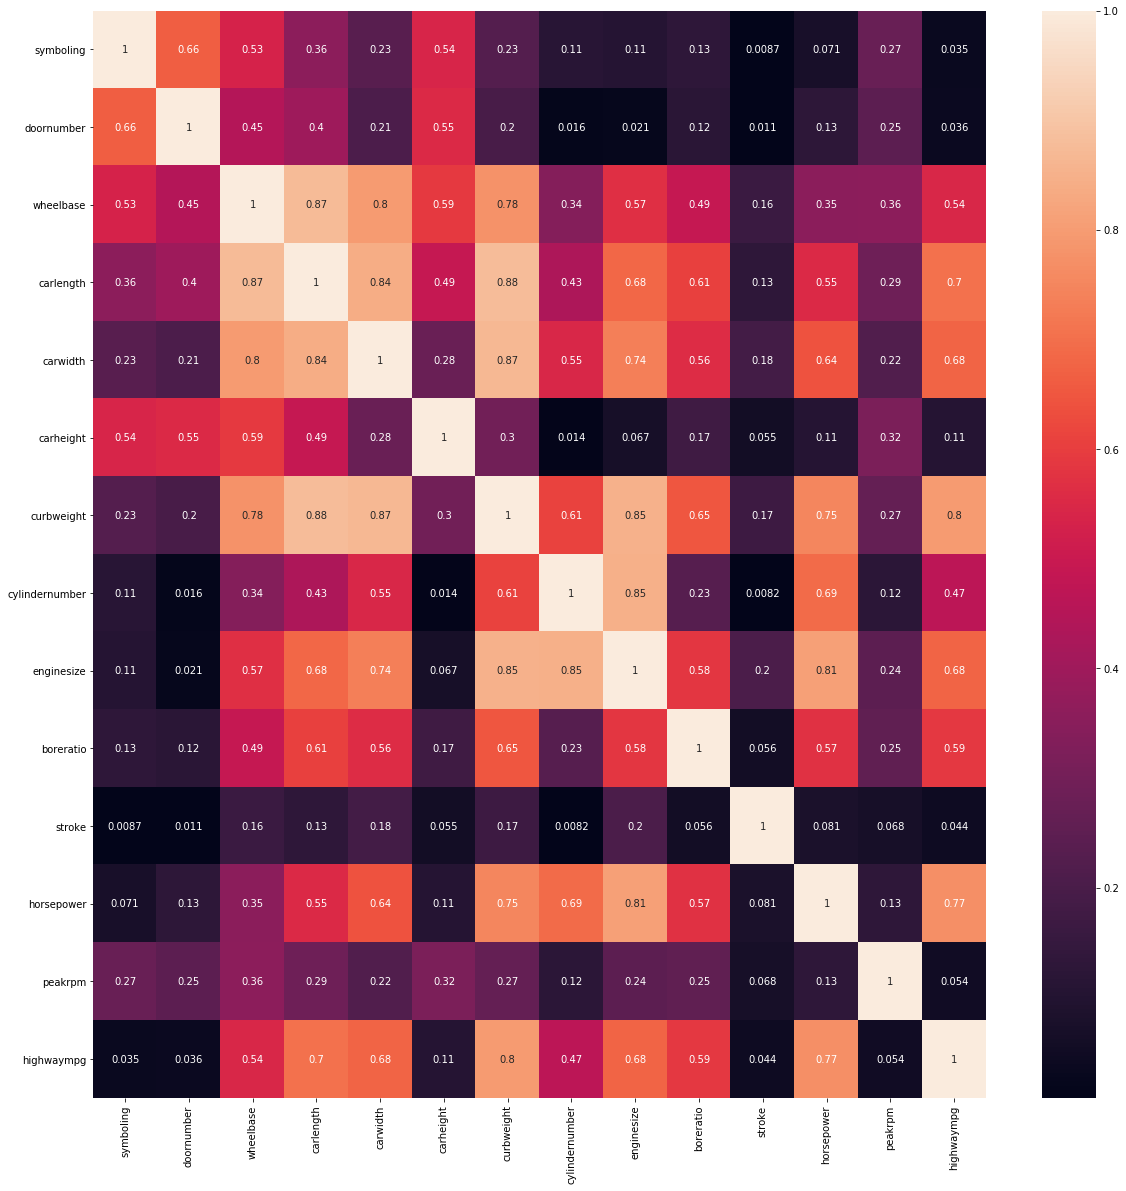

In [434]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True)
#Min Max Scaling of numerical columns in X_train


In [435]:
#Creating dummy variables for categories 
varlist=['fueltype','aspiration','carbody','drivewheel','fuelsystem','enginetype','Company','doornumber','enginelocation']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_',drop_first=True)


In [283]:
# #Dropping variable with corelation more than 0.8
# correlation_matrix = carprice.drop('price', axis=1).corr()
# i=0
# while i<len(correlation_matrix.columns):
#     for j in range(i):
#         correlation_matrix = carprice.drop('price', axis=1).corr()
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             print("Dropped Column: "+colname+" as its corelation with "+ correlation_matrix.columns[j]+" was {:.3f}".format(correlation_matrix.iloc[i, j]))
# #             carprice.drop(colname,axis=1,inplace=True)
#     i=i+1

# # 

In [436]:
carprice.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,doornumber_4,enginelocation_rear
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0


In [437]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [438]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 58)
(62, 58)


In [439]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

mm_scaler_list=['wheelbase','carwidth','carheight','boreratio','stroke','horsepower','peakrpm',
         'highwaympg','symboling','cylindernumber']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


In [440]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [441]:
# #Min Max Scaling of numerical columns in X_train

# from sklearn.preprocessing import LabelEncoder
# le_scaler=LabelEncoder()

# le_scaler_list=['symboling','doornumber','cylindernumber']

# X_train[le_scaler_list]=X_train[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))


In [442]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [448]:
#Feature selection using RFE

from sklearn.feature_selection import RFE
rfe=RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [449]:
# rfe.support_

In [450]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [451]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carwidth,cylindernumber,horsepower,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_rotor,Company_bmw,Company_buick,Company_porsche,enginelocation_rear
122,0.244828,0.291667,0.2,0.083333,0.567568,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.666667,0.2,0.395833,0.270270,0,1,0,0,0,0,0,0,1,0
166,0.272414,0.308333,0.2,0.266667,0.324324,0,1,0,0,0,0,0,0,0,0
1,0.068966,0.316667,0.2,0.262500,0.270270,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.575000,0.2,0.475000,0.135135,0,0,0,1,0,0,0,0,0,0


In [452]:
#Creating our first model with 20 variables from RFE

X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     96.62
Date:                Thu, 21 May 2020   Prob (F-statistic):           8.21e-62
Time:                        04:24:16   Log-Likelihood:                -1304.0
No. Observations:                 143   AIC:                             2640.
Df Residuals:                     127   BIC:                             2687.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1278.5404   1789.709      0.714      0.476   -2262.971    4820.051
wheelbase            9526.7342   2177.589      4.375      0.000    5217.679    1.38e+04
carwidth             9336.7640   2884.165      3.237      0.002    3629.523     1.5e+04
cylindernumber       8254.2226   3203.956      2.576      0.011    1914.172    1.46e+04
horsepower           2.237e+04   3324.739      6.729      0.000    1.58e+04     2.9e+04
highwaympg           5915.1338   2218.006      2.667      0.009    1526.101    1.03e+04
carbody_hardtop     -6749.0093   2144.508     -3.147      0.002    -1.1e+04   -2505.415
carbody_hatchback   -7223.4796   1369.096     -5.276      0.000   -9932.674   -4514.285
carbody_sedan       -6439.5072   1400.287     -4.599      0.000   -9210.423   -3668.592
carbody_wagon       -6991.8218   1470.413     -4.755      0.000   -9901.503   -4082.140
enginetype_dohcv    -1.199e+04   3656.952     -3.278      0.001   -1.92e+04   -4751.863
enginetype_rotor     5213.5940   1524.800      3.419      0.001    2196.289    8230.899
Company_bmw          8794.0283   1077.054      8.165      0.000    6662.732    1.09e+04
Company_buick        6639.3588   1318.198      5.037      0.000    4030.883    9247.834
Company_porsche      7038.4969   2516.390      2.797      0.006    2059.016     1.2e+04
enginelocation_rear  8448.9710   3863.093      2.187      0.031     804.607    1.61e+04
==============================================================================
Omnibus:                       39.835   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.313
Skew:                           1.060   Prob(JB):                     2.48e-25
Kurtosis:                       6.811   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.42
8,carbody_sedan,12.74
7,carbody_hatchback,11.00
4,horsepower,7.83
2,carwidth,7.32
9,carbody_wagon,6.49
1,wheelbase,5.18
5,highwaympg,4.52
3,cylindernumber,3.56
14,Company_porsche,3.39


In [299]:
#Creating our second model after dropping carbody_sedan as it has high P value

X_train_rfe.drop('Company_saab', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     81.31
Date:                Thu, 21 May 2020   Prob (F-statistic):           3.09e-60
Time:                        03:29:22   Log-Likelihood:                -1297.7
No. Observations:                 143   AIC:                             2635.
Df Residuals:                     123   BIC:                             2695.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1271.6962   1849.327      0.688      0.493   -2388.934    4932.326
wheelbase          1.118e+04   2415.346      4.630      0.000    6402.998     1.6e+04
carwidth           9962.9077   2911.665      3.422      0.001    4199.445    1.57e+04
cylindernumber     8648.1979   3312.776      2.611      0.010    2090.761    1.52e+04
stroke             1771.4510   1762.269      1.005      0.317   -1716.852    5259.754
horsepower         1.964e+04   3403.455      5.772      0.000    1.29e+04    2.64e+04
highwaympg         4630.2266   2319.134      1.997      0.048      39.642    9220.811
carbody_hardtop   -7630.0601   2152.877     -3.544      0.001   -1.19e+04   -3368.573
carbody_hatchback -8061.2339   1408.819     -5.722      0.000   -1.08e+04   -5272.563
carbody_sedan     -7264.4165   1451.672     -5.004      0.000   -1.01e+04   -4390.921
carbody_wagon     -7605.0620   1508.505     -5.041      0.000   -1.06e+04   -4619.069
enginetype_dohcv   -1.09e+04   3582.644     -3.041      0.003    -1.8e+04   -3803.617
enginetype_l       5124.9270   2493.589      2.055      0.042     189.021    1.01e+04
enginetype_ohcf    9717.0114   3778.347      2.572      0.011    2238.006    1.72e+04
enginetype_rotor   5233.5547   1527.441      3.426      0.001    2210.079    8257.031
Company_bmw        8602.0898   1058.618      8.126      0.000    6506.621    1.07e+04
Company_buick      5307.2748   1349.192      3.934      0.000    2636.632    7977.918
Company_peugeot   -7655.7852   2749.715     -2.784      0.006   -1.31e+04   -2212.893
Company_porsche    7538.9875   2490.865      3.027      0.003    2608.474    1.25e+04
Company_subaru    -9626.5600   3927.766     -2.451      0.016   -1.74e+04   -1851.788
==============================================================================
Omnibus:                       28.266   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.102
Skew:                           0.749   Prob(JB):                     4.92e-17
Kurtosis:                       6.218   Cond. No.                         49.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.24
13,enginetype_ohcf,30.24
19,Company_subaru,30.19
9,carbody_sedan,14.48
8,carbody_hatchback,12.32
17,Company_peugeot,11.00
12,enginetype_l,10.11
5,horsepower,8.68
2,carwidth,7.90
10,carbody_wagon,7.22


All the variables have less than 0.05 P value, so lets remove the factor with highest VIF- Company_subaru

In [301]:
#Creating our third model after dropping carbody_hatchback as it has high P value

X_train_rfe.drop('stroke', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     85.76
Date:                Thu, 21 May 2020   Prob (F-statistic):           5.39e-61
Time:                        03:29:41   Log-Likelihood:                -1298.3
No. Observations:                 143   AIC:                             2635.
Df Residuals:                     124   BIC:                             2691.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1817.6596   1767.846      1.028      0.306   -1681.404    5316.723
wheelbase          1.121e+04   2415.314      4.641      0.000    6428.980     1.6e+04
carwidth           1.051e+04   2859.594      3.677      0.000    4854.651    1.62e+04
cylindernumber     7641.3521   3157.858      2.420      0.017    1391.066    1.39e+04
horsepower         2.014e+04   3367.464      5.981      0.000    1.35e+04    2.68e+04
highwaympg         4815.8352   2311.869      2.083      0.039     239.998    9391.672
carbody_hardtop   -7282.7539   2125.061     -3.427      0.001   -1.15e+04   -3076.663
carbody_hatchback -7754.2326   1375.374     -5.638      0.000   -1.05e+04   -5031.981
carbody_sedan     -6979.8562   1423.863     -4.902      0.000   -9798.080   -4161.633
carbody_wagon     -7360.0882   1488.752     -4.944      0.000   -1.03e+04   -4413.431
enginetype_dohcv  -1.099e+04   3581.676     -3.067      0.003   -1.81e+04   -3896.094
enginetype_l       4941.9943   2487.044      1.987      0.049      19.438    9864.551
enginetype_ohcf    9723.7578   3778.500      2.573      0.011    2245.048    1.72e+04
enginetype_rotor   4919.9946   1495.313      3.290      0.001    1960.351    7879.638
Company_bmw        8500.3695   1053.815      8.066      0.000    6414.575    1.06e+04
Company_buick      5352.9710   1348.483      3.970      0.000    2683.946    8021.996
Company_peugeot   -7710.3691   2749.294     -2.804      0.006   -1.32e+04   -2268.746
Company_porsche    7088.7771   2450.371      2.893      0.005    2238.806    1.19e+04
Company_subaru    -1.025e+04   3878.629     -2.643      0.009   -1.79e+04   -2573.266
==============================================================================
Omnibus:                       34.272   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.831
Skew:                           0.881   Prob(JB):                     7.72e-23
Kurtosis:                       6.740   Cond. No.                         46.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.12
12,enginetype_ohcf,30.24
18,Company_subaru,29.43
8,carbody_sedan,13.93
7,carbody_hatchback,11.74
16,Company_peugeot,11.00
11,enginetype_l,10.05
4,horsepower,8.50
2,carwidth,7.62
9,carbody_wagon,7.04


After dropping Company_subaru, VIF has decreased significantly for some variables. P value has increased now for enginetype_ohcf, lets drop this variable now to build our fourth model

In [303]:
#Creating our fourth model after dropping enginelocation_rear as it has high VIF

X_train_rfe.drop('enginetype_ohcf', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     86.52
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.39e-60
Time:                        03:30:02   Log-Likelihood:                -1302.0
No. Observations:                 143   AIC:                             2640.
Df Residuals:                     125   BIC:                             2693.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1724.1777   1806.787      0.954      0.342   -1851.678    5300.034
wheelbase          1.143e+04   2467.433      4.634      0.000    6550.243    1.63e+04
carwidth           9061.9237   2865.681      3.162      0.002    3390.386    1.47e+04
cylindernumber     8196.9703   3220.545      2.545      0.012    1823.112    1.46e+04
horsepower         2.149e+04   3400.477      6.319      0.000    1.48e+04    2.82e+04
highwaympg         5132.2087   2359.949      2.175      0.032     461.577    9802.840
carbody_hardtop   -5469.8702   2049.495     -2.669      0.009   -9526.074   -1413.666
carbody_hatchback -7781.6528   1405.925     -5.535      0.000   -1.06e+04   -4999.153
carbody_sedan     -6860.4798   1454.761     -4.716      0.000   -9739.633   -3981.327
carbody_wagon     -7268.0086   1521.427     -4.777      0.000   -1.03e+04   -4256.916
enginetype_dohcv  -1.511e+04   3274.107     -4.615      0.000   -2.16e+04   -8630.964
enginetype_l       4685.6061   2540.323      1.844      0.067    -342.007    9713.220
enginetype_rotor   5230.7012   1523.583      3.433      0.001    2215.342    8246.061
Company_bmw        8336.7516   1075.292      7.753      0.000    6208.615    1.05e+04
Company_buick      5691.3209   1371.909      4.148      0.000    2976.142    8406.500
Company_peugeot   -7174.1588   2802.364     -2.560      0.012   -1.27e+04   -1627.932
Company_porsche    1.092e+04   1989.088      5.491      0.000    6984.874    1.49e+04
Company_subaru     -466.1799    784.742     -0.594      0.554   -2019.282    1086.922
==============================================================================
Omnibus:                       28.436   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.843
Skew:                           0.764   Prob(JB):                     9.23e-17
Kurtosis:                       6.172   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.08
8,carbody_sedan,13.92
7,carbody_hatchback,11.74
15,Company_peugeot,10.94
11,enginetype_l,10.04
4,horsepower,8.29
2,carwidth,7.32
9,carbody_wagon,7.03
1,wheelbase,6.74
5,highwaympg,5.18


P-value is now lower than 0.05 for all variables. On checking VIF, we can identify that carbody has a high VIF(11.57), lets drop this variable and validate if on dropping the variable, our R square adjusted drops or not.

In [305]:
#Creating our fifth model after dropping enginetype_ohcf as it has high VIF

X_train_rfe.drop('Company_subaru', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     92.38
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.69e-61
Time:                        03:30:19   Log-Likelihood:                -1302.2
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     126   BIC:                             2689.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1563.1816   1781.753      0.877      0.382   -1962.855    5089.219
wheelbase          1.168e+04   2425.814      4.815      0.000    6880.268    1.65e+04
carwidth           8958.5181   2853.035      3.140      0.002    3312.446    1.46e+04
cylindernumber     8267.7985   3210.062      2.576      0.011    1915.179    1.46e+04
horsepower         2.175e+04   3364.398      6.463      0.000    1.51e+04    2.84e+04
highwaympg         5424.9088   2302.006      2.357      0.020     869.306    9980.512
carbody_hardtop   -5562.3721   2038.317     -2.729      0.007   -9596.141   -1528.604
carbody_hatchback -7872.6055   1393.970     -5.648      0.000   -1.06e+04   -5113.980
carbody_sedan     -6989.4016   1434.784     -4.871      0.000   -9828.797   -4150.006
carbody_wagon     -7445.5845   1487.937     -5.004      0.000   -1.04e+04   -4501.001
enginetype_dohcv  -1.528e+04   3254.024     -4.694      0.000   -2.17e+04   -8835.450
enginetype_l       4630.3341   2532.091      1.829      0.070    -380.599    9641.268
enginetype_rotor   5341.9452   1508.143      3.542      0.001    2357.374    8326.516
Company_bmw        8350.2620   1072.288      7.787      0.000    6228.236    1.05e+04
Company_buick      5696.2272   1368.357      4.163      0.000    2988.289    8404.166
Company_peugeot   -7097.0611   2792.160     -2.542      0.012   -1.26e+04   -1571.459
Company_porsche    1.096e+04   1983.176      5.524      0.000    7030.389    1.49e+04
==============================================================================
Omnibus:                       27.939   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.930
Skew:                           0.758   Prob(JB):                     3.96e-16
Kurtosis:                       6.100   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.14
8,carbody_sedan,13.61
7,carbody_hatchback,11.60
15,Company_peugeot,10.91
11,enginetype_l,10.02
4,horsepower,8.16
2,carwidth,7.29
9,carbody_wagon,6.76
1,wheelbase,6.55
5,highwaympg,4.95


Dropping carbody_sedan has given us mixed result, at one side it has decreased VIF of variable and on the other, P-value of few variables has increases. Lets drop the variable 'carbody_hardtop' and validate if it can help us reduce p value and VIF of variables.

In [307]:
#Creating our sixth model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('enginetype_l', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     96.54
Date:                Thu, 21 May 2020   Prob (F-statistic):           8.63e-62
Time:                        03:30:29   Log-Likelihood:                -1304.1
No. Observations:                 143   AIC:                             2640.
Df Residuals:                     127   BIC:                             2688.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1260.4692   1790.343      0.704      0.483   -2282.297    4803.235
wheelbase          1.225e+04   2428.034      5.044      0.000    7443.022    1.71e+04
carwidth           8012.7483   2831.540      2.830      0.005    2409.643    1.36e+04
cylindernumber     7755.3088   3227.181      2.403      0.018    1369.300    1.41e+04
horsepower         2.325e+04   3291.866      7.063      0.000    1.67e+04    2.98e+04
highwaympg         6622.5082   2227.156      2.974      0.004    2215.369     1.1e+04
carbody_hardtop   -5872.1855   2049.923     -2.865      0.005   -9928.613   -1815.758
carbody_hatchback -7985.1634   1405.403     -5.682      0.000   -1.08e+04   -5204.124
carbody_sedan     -7157.6219   1444.985     -4.953      0.000      -1e+04   -4298.257
carbody_wagon     -7581.5510   1499.729     -5.055      0.000   -1.05e+04   -4613.857
enginetype_dohcv  -1.567e+04   3276.527     -4.784      0.000   -2.22e+04   -9190.375
enginetype_rotor   5432.3942   1521.178      3.571      0.001    2422.257    8442.532
Company_bmw        8348.3431   1082.137      7.715      0.000    6206.989    1.05e+04
Company_buick      6009.3717   1370.071      4.386      0.000    3298.249    8720.495
Company_peugeot   -2405.7074   1112.201     -2.163      0.032   -4606.553    -204.862
Company_porsche    1.093e+04   2001.341      5.461      0.000    6968.537    1.49e+04
==============================================================================
Omnibus:                       26.593   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.097
Skew:                           0.751   Prob(JB):                     3.28e-14
Kurtosis:                       5.858   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.42
8,carbody_sedan,13.55
7,carbody_hatchback,11.58
4,horsepower,7.67
2,carwidth,7.05
9,carbody_wagon,6.74
1,wheelbase,6.44
5,highwaympg,4.55
3,cylindernumber,3.61
6,carbody_hardtop,2.25


On dropping 'carbody_hardtop', our adjusted R square has just dropped by 0.001, lets drop 'carbody_wagon' since it has a high P value.

In [309]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     85.89
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.08e-58
Time:                        03:30:48   Log-Likelihood:                -1316.7
No. Observations:                 143   AIC:                             2663.
Df Residuals:                     128   BIC:                             2708.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2637.2383   1749.772     -1.507      0.134   -6099.460     824.984
wheelbase          6967.3573   2373.623      2.935      0.004    2270.738    1.17e+04
carwidth           9394.5912   3065.901      3.064      0.003    3328.183    1.55e+04
cylindernumber     8032.4649   3510.844      2.288      0.024    1085.661     1.5e+04
horsepower         2.214e+04   3573.397      6.195      0.000    1.51e+04    2.92e+04
highwaympg         3529.2167   2326.074      1.517      0.132   -1073.319    8131.752
carbody_hardtop     756.8379   1689.551      0.448      0.655   -2586.227    4099.903
carbody_hatchback -1462.0687    534.113     -2.737      0.007   -2518.903    -405.235
carbody_wagon      -862.9871    696.282     -1.239      0.217   -2240.699     514.725
enginetype_dohcv   -1.45e+04   3555.695     -4.077      0.000   -2.15e+04   -7462.645
enginetype_rotor   4556.1365   1643.906      2.772      0.006    1303.388    7808.885
Company_bmw        8430.8756   1177.292      7.161      0.000    6101.401    1.08e+04
Company_buick      7954.2760   1428.194      5.569      0.000    5128.350    1.08e+04
Company_peugeot   -1051.5864   1173.019     -0.896      0.372   -3372.605    1269.432
Company_porsche    9760.8162   2162.416      4.514      0.000    5482.107     1.4e+04
==============================================================================
Omnibus:                       34.699   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.986
Skew:                           1.061   Prob(JB):                     6.35e-16
Kurtosis:                       5.691   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.30
4,horsepower,7.64
2,carwidth,6.99
1,wheelbase,5.20
5,highwaympg,4.20
3,cylindernumber,3.61
14,Company_porsche,2.11
9,enginetype_dohcv,1.93
10,enginetype_rotor,1.62
13,Company_peugeot,1.60


"Horsepower" has a high VIF, lets drop the variable and check P values and VIF of the remaining variables.

In [311]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('carbody_hardtop', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     93.06
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.81e-59
Time:                        03:31:12   Log-Likelihood:                -1316.8
No. Observations:                 143   AIC:                             2662.
Df Residuals:                     129   BIC:                             2703.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2584.7835   1740.431     -1.485      0.140   -6028.270     858.703
wheelbase          7030.2857   2362.110      2.976      0.003    2356.793    1.17e+04
carwidth           9158.3954   3010.847      3.042      0.003    3201.360    1.51e+04
cylindernumber     7977.2848   3497.794      2.281      0.024    1056.813    1.49e+04
horsepower         2.238e+04   3522.469      6.353      0.000    1.54e+04    2.93e+04
highwaympg         3584.7507   2315.561      1.548      0.124    -996.643    8166.144
carbody_hatchback -1509.5753    521.854     -2.893      0.004   -2542.076    -477.074
carbody_wagon      -892.4814    691.010     -1.292      0.199   -2259.663     474.700
enginetype_dohcv  -1.485e+04   3454.890     -4.300      0.000   -2.17e+04   -8018.803
enginetype_rotor   4568.4185   1638.577      2.788      0.006    1326.454    7810.383
Company_bmw        8385.7389   1169.333      7.171      0.000    6072.185    1.07e+04
Company_buick      7994.5744   1420.935      5.626      0.000    5183.220    1.08e+04
Company_peugeot   -1042.9837   1169.223     -0.892      0.374   -3356.319    1270.352
Company_porsche     1.01e+04   2018.794      5.003      0.000    6106.288    1.41e+04
==============================================================================
Omnibus:                       33.792   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.201
Skew:                           1.040   Prob(JB):                     2.56e-15
Kurtosis:                       5.637   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.00
4,horsepower,7.47
2,carwidth,6.78
1,wheelbase,5.18
5,highwaympg,4.18
3,cylindernumber,3.60
13,Company_porsche,1.85
8,enginetype_dohcv,1.83
9,enginetype_rotor,1.61
12,Company_peugeot,1.60


In [313]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_peugeot', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     100.9
Date:                Thu, 21 May 2020   Prob (F-statistic):           9.81e-60
Time:                        03:31:22   Log-Likelihood:                -1317.2
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     130   BIC:                             2699.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2406.3940   1727.545     -1.393      0.166   -5824.135    1011.347
wheelbase          6205.9387   2172.127      2.857      0.005    1908.646    1.05e+04
carwidth           9147.0300   3008.454      3.040      0.003    3195.164    1.51e+04
cylindernumber     8384.4085   3465.165      2.420      0.017    1528.994    1.52e+04
horsepower         2.251e+04   3516.799      6.399      0.000    1.55e+04    2.95e+04
highwaympg         3517.2043   2312.503      1.521      0.131   -1057.807    8092.215
carbody_hatchback -1514.7559    521.412     -2.905      0.004   -2546.306    -483.205
carbody_wagon      -931.9994    689.047     -1.353      0.179   -2295.196     431.198
enginetype_dohcv  -1.484e+04   3452.151     -4.300      0.000   -2.17e+04   -8013.389
enginetype_rotor   4625.8994   1636.023      2.828      0.005    1389.224    7862.574
Company_bmw        8510.0022   1160.093      7.336      0.000    6214.897    1.08e+04
Company_buick      8278.6258   1383.707      5.983      0.000    5541.128     1.1e+04
Company_porsche    9911.0394   2006.010      4.941      0.000    5942.389    1.39e+04
==============================================================================
Omnibus:                       36.095   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.518
Skew:                           1.087   Prob(JB):                     3.99e-17
Kurtosis:                       5.820   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('carbody_wagon', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     109.2
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.25e-60
Time:                        03:31:28   Log-Likelihood:                -1318.2
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     131   BIC:                             2696.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3082.6536   1658.841     -1.858      0.065   -6364.237     198.930
wheelbase          5718.2960   2148.769      2.661      0.009    1467.518    9969.074
carwidth           9879.2516   2968.702      3.328      0.001    4006.450    1.58e+04
cylindernumber     8449.0093   3475.788      2.431      0.016    1573.071    1.53e+04
horsepower         2.293e+04   3513.529      6.527      0.000     1.6e+04    2.99e+04
highwaympg         4162.1446   2269.964      1.834      0.069    -328.386    8652.675
carbody_hatchback -1356.3053    509.688     -2.661      0.009   -2364.589    -348.022
enginetype_dohcv  -1.542e+04   3436.921     -4.485      0.000   -2.22e+04   -8616.671
enginetype_rotor   4745.9470   1638.777      2.896      0.004    1504.055    7987.839
Company_bmw        8749.9427   1150.074      7.608      0.000    6474.822     1.1e+04
Company_buick      8232.9986   1387.668      5.933      0.000    5487.860     1.1e+04
Company_porsche    9808.0596   2010.901      4.877      0.000    5830.017    1.38e+04
==============================================================================
Omnibus:                       38.901   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.824
Skew:                           1.153   Prob(JB):                     3.81e-19
Kurtosis:                       5.986   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.58
4,horsepower,7.39
2,carwidth,6.56
1,wheelbase,4.27
5,highwaympg,4.00
3,cylindernumber,3.54
11,Company_porsche,1.83
7,enginetype_dohcv,1.81
8,enginetype_rotor,1.61
10,Company_buick,1.43


In [316]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('highwaympg', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     117.7
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.05e-60
Time:                        03:31:42   Log-Likelihood:                -1320.0
No. Observations:                 143   AIC:                             2662.
Df Residuals:                     132   BIC:                             2695.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -486.4667    871.951     -0.558      0.578   -2211.271    1238.338
wheelbase          5143.7096   2144.731      2.398      0.018     901.220    9386.200
carwidth           9412.3469   2984.107      3.154      0.002    3509.489    1.53e+04
cylindernumber     9695.3703   3439.035      2.819      0.006    2892.620    1.65e+04
horsepower         1.886e+04   2746.440      6.868      0.000    1.34e+04    2.43e+04
carbody_hatchback -1235.7634    509.932     -2.423      0.017   -2244.459    -227.067
enginetype_dohcv  -1.336e+04   3277.954     -4.076      0.000   -1.98e+04   -6876.423
enginetype_rotor   4130.3684   1618.307      2.552      0.012     929.197    7331.540
Company_bmw        8743.4706   1160.312      7.535      0.000    6448.258     1.1e+04
Company_buick      8055.7022   1396.625      5.768      0.000    5293.039    1.08e+04
Company_porsche     1.03e+04   2010.711      5.122      0.000    6322.119    1.43e+04
==============================================================================
Omnibus:                       41.660   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.472
Skew:                           1.208   Prob(JB):                     1.13e-21
Kurtosis:                       6.218   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.44
2,carwidth,6.51
4,horsepower,4.44
1,wheelbase,4.18
3,cylindernumber,3.41
10,Company_porsche,1.80
6,enginetype_dohcv,1.61
7,enginetype_rotor,1.54
9,Company_buick,1.42
5,carbody_hatchback,1.27


In [318]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('carwidth', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.5
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.08e-59
Time:                        03:31:50   Log-Likelihood:                -1325.2
No. Observations:                 143   AIC:                             2670.
Df Residuals:                     133   BIC:                             2700.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               625.7997    823.854      0.760      0.449   -1003.752    2255.351
wheelbase          1.039e+04   1399.512      7.423      0.000    7620.083    1.32e+04
cylindernumber      1.03e+04   3547.382      2.903      0.004    3280.175    1.73e+04
horsepower         2.268e+04   2546.457      8.907      0.000    1.76e+04    2.77e+04
carbody_hatchback -1206.1931    526.719     -2.290      0.024   -2248.022    -164.364
enginetype_dohcv  -1.208e+04   3360.379     -3.595      0.000   -1.87e+04   -5433.716
enginetype_rotor   4671.6740   1662.436      2.810      0.006    1383.440    7959.908
Company_bmw        7940.5350   1169.507      6.790      0.000    5627.295    1.03e+04
Company_buick      9455.1220   1368.105      6.911      0.000    6749.063    1.22e+04
Company_porsche    1.097e+04   2065.459      5.313      0.000    6888.992    1.51e+04
==============================================================================
Omnibus:                       29.132   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.758
Skew:                           0.913   Prob(JB):                     7.80e-13
Kurtosis:                       5.454   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.75
3,horsepower,3.57
2,cylindernumber,3.40
9,Company_porsche,1.78
1,wheelbase,1.67
5,enginetype_dohcv,1.59
6,enginetype_rotor,1.52
8,Company_buick,1.28
4,carbody_hatchback,1.27
7,Company_bmw,1.11


In [206]:
y_train_predict=lr8.predict(X_train_rfe)

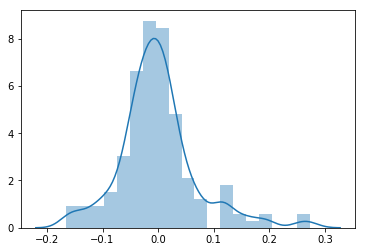

In [207]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

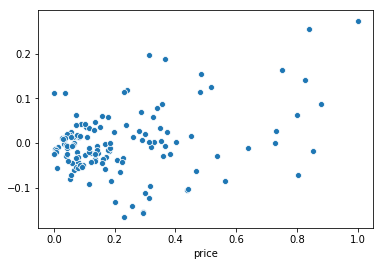

In [208]:
sns.scatterplot(y_train,y_train-y_train_predict)

In [210]:
X_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,doornumber_4
160,0,95.7,166.3,64.4,53.0,2094,4,98,3.19,3.03,...,0,0,0,0,0,0,1,0,0,1
186,2,97.3,171.7,65.5,55.7,2275,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,1
59,1,98.8,177.8,66.5,53.7,2385,4,122,3.39,3.39,...,0,0,0,0,0,0,0,0,0,0
165,1,94.5,168.7,64.0,52.6,2265,4,98,3.24,3.08,...,0,0,0,0,0,0,1,0,0,0
140,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,2.64,...,0,0,0,0,0,1,0,0,0,0


In [211]:
X_test_rfe=X_test.copy()

In [212]:
#Min Max Scaling of numerical columns in X_test

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])
# X_test_rfe[le_scaler_list]=X_test_rfe[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))

In [213]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [214]:
X_test_rfe=sm.add_constant(X_test_rfe)
y_test_predict=lr8.predict(X_test_rfe)

In [215]:
from sklearn.metrics import r2_score
r2_score(y_test_rfe,y_test_predict)

0.9192117391372214

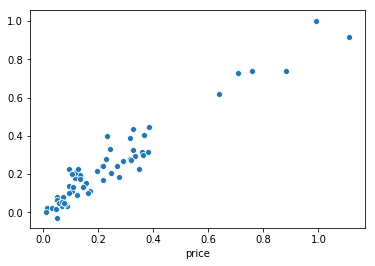

In [216]:
sns.scatterplot(y_test_rfe,y_test_predict)

In [217]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_rfe,y_test_predict)

0.0043179899427575295

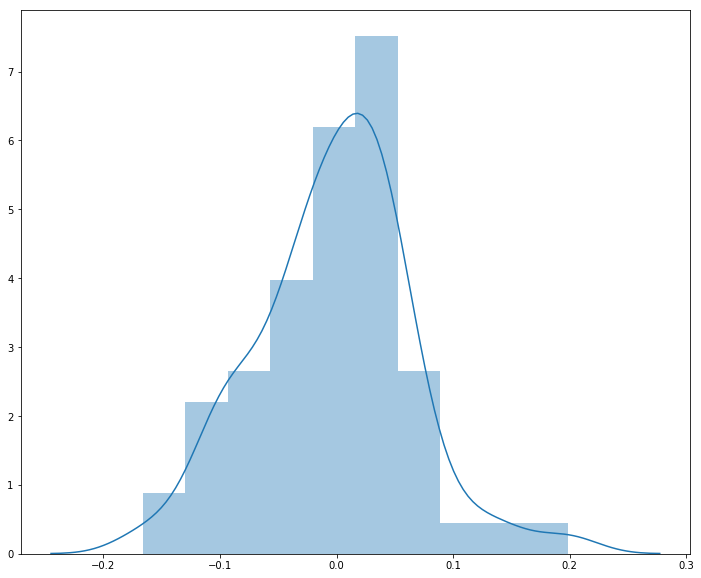

In [253]:
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict)

Our Linear Regression equation becomes:
    

Index(['const', 'wheelbase', 'cylindernumber', 'horsepower',
       'carbody_hatchback', 'enginetype_dohcv', 'enginetype_rotor',
       'Company_bmw', 'Company_buick', 'Company_porsche'],
      dtype='object')


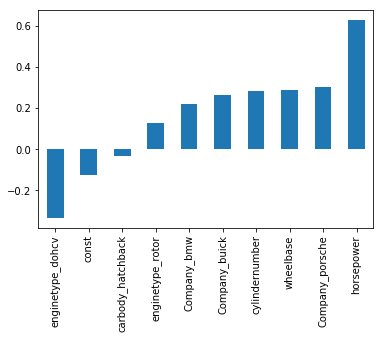

horsepower           0.626624
Company_porsche      0.303185
wheelbase            0.286992
cylindernumber       0.284464
Company_buick        0.261213
Company_bmw          0.219370
enginetype_rotor     0.129062
carbody_hatchback   -0.033323
const               -0.124104
enginetype_dohcv    -0.333741
dtype: float64


In [252]:
coefs = pd.Series(lr8.params.values, index=X_train_rfe.columns)
print (X_train_rfe.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print (coefs.sort_values(ascending = False))

In [248]:
lr8.params.values

array([-0.12410421,  0.2869924 ,  0.28446445,  0.62662411, -0.03332301,
       -0.33374076,  0.12906246,  0.21936998,  0.26121286,  0.30318508])